In [1]:
import numpy as np
import statsmodels
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import acf
import pandas as pd

# Exercise 3.5.1

In [2]:
class Random_walk:
    def __init__(self, initial_value, seed, size):
        np.random.seed(seed)
        self.size = size
        self.initial_value = initial_value
        
        random_walk = np.zeros(size)
        random_walk[0] = initial_value
        for i in range(1,size):
            random_walk[i] = random_walk[i-1] + np.random.normal()
        self.random_walk = random_walk
    
    def first_order_difference(self):
        size = self.size -1
        random_walk = self.random_walk
        fod = np.zeros(size)
        for i in range(size):
            fod[i] = random_walk[i+1]- random_walk[i]
        return fod

In [3]:
ejemplo = Random_walk(1.0,2,500)

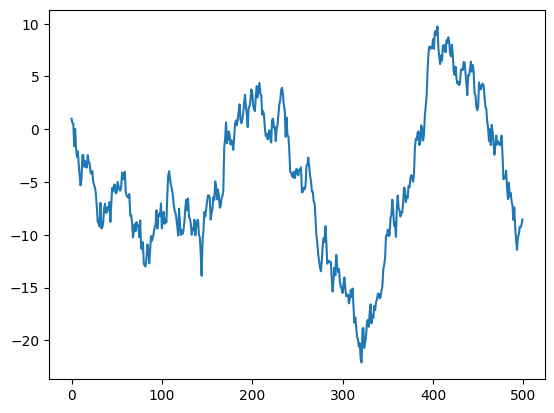

In [4]:
plt.plot(range(500), ejemplo.random_walk)

## Random Walk Testing

In [5]:
def stationary_test(data, alpha=0.05):
    ADF_result = adfuller(data)
    return ADF_result[1] < alpha

def autocorrelation_test(data, alpha = 0.05):
    acf_values, confidence_intervals = acf(data,alpha = alpha)  
    return sum([(val >= interval[0]) and (val <= interval[1]) for val, interval in zip(acf_values[1:],confidence_intervals[1:])])/len(acf_values[1:])>=0.5

In [6]:
stationary_test(ejemplo.random_walk)

False

In [7]:
fod = ejemplo.first_order_difference()
stationary_test(fod)

True

In [8]:
autocorrelation_test(fod)

True

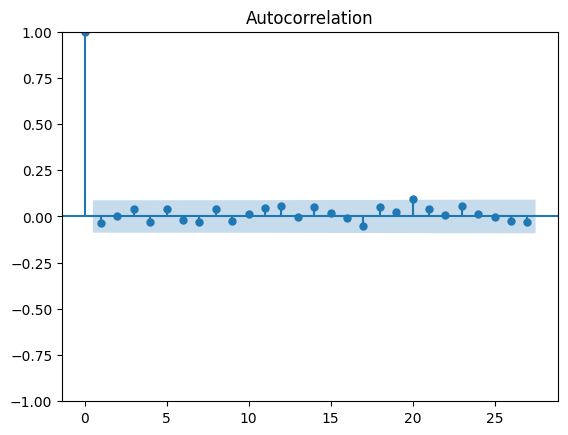

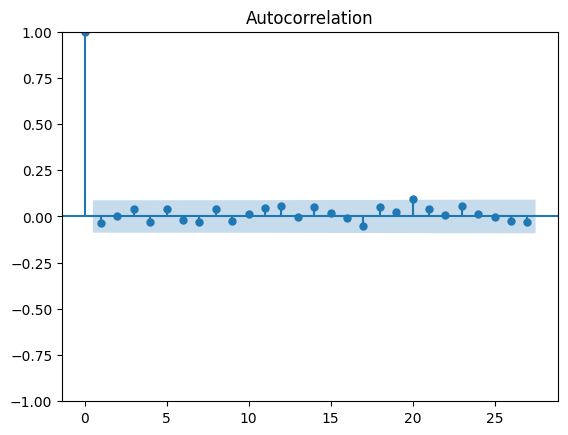

In [9]:
plot_acf(fod)

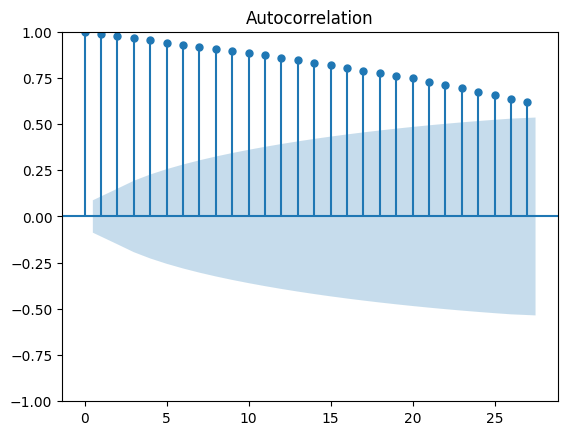

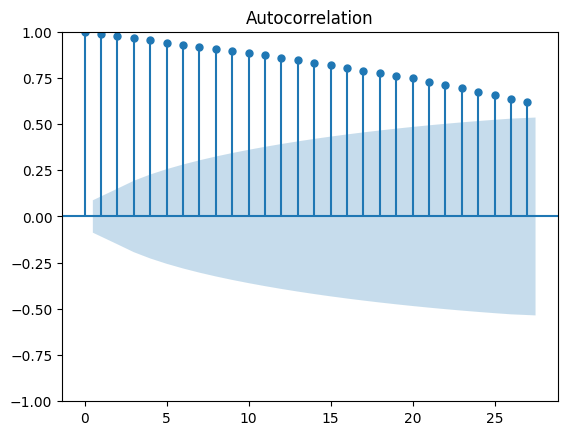

In [10]:
plot_acf(ejemplo.random_walk)

## A Naive Forecasting

In [11]:
X_train, X_test = ejemplo.random_walk[:400], ejemplo.random_walk[400:]


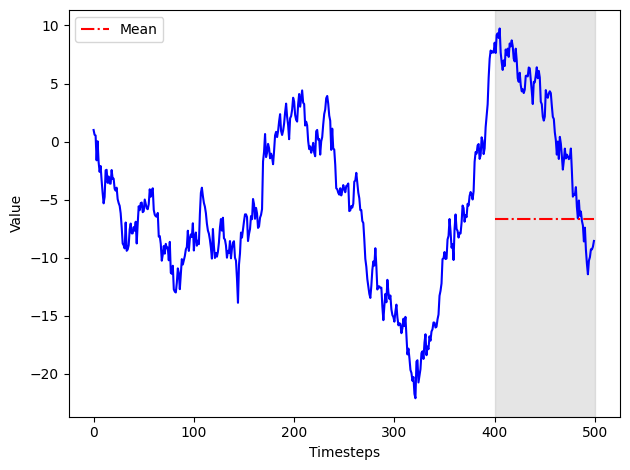

In [12]:
fig, ax = plt.subplots()

ax.plot(ejemplo.random_walk, 'b-')
ax.plot(range(400,500),np.mean(X_train)*np.ones(100), 'r-.', label='Mean')


ax.axvspan(400, 500, color='#808080', alpha=0.2)
ax.legend(loc=2)

ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

plt.tight_layout()

# Exercise 3.5.2

In [13]:
df = pd.read_csv('GOOGL.csv')['Close']
df

0       63.542999
1       61.629501
2       67.109001
3       67.334999
4       65.865997
          ...    
247    113.950500
248    113.917503
249    112.625999
250    114.996498
251    115.496498
Name: Close, Length: 252, dtype: float64

In [14]:
df_train, df_test = df[:-5], df[-5:]

### Some naive forecasting

In [22]:
### Mean
data = list(df_train)
data[247:251] = np.mean(np.array(df_train))* np.ones(5)
df_forecasting_mean = pd.DataFrame(data[247:252])

### Last Value
data[247:251] = data[246]*np.ones(5)
df_forecasting_last_value = pd.DataFrame(data[247:252])

### Slope
slope = (data[246]- data[0])/246
independent_term = data[0]
for i in range(247,252):
    data[i] = i*slope + independent_term
df_forecasting_slope = pd.DataFrame(data[247:252])

In [23]:
df_forecasting_slope

,0
0,114.695092
1,114.902186
2,115.109279
3,115.316373
4,115.523466


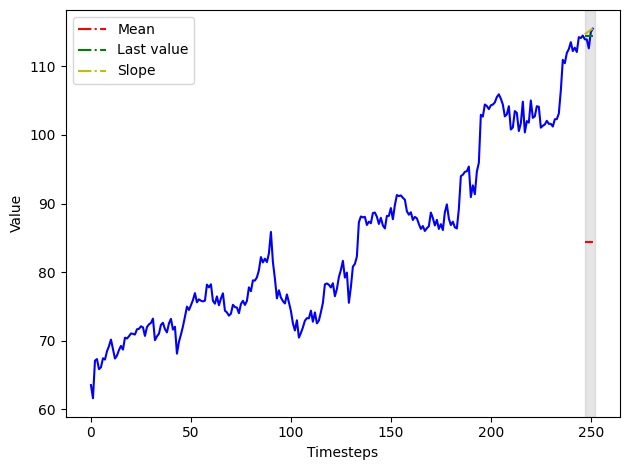

In [25]:
fig, ax = plt.subplots()

ax.plot(df, 'b-')
ax.plot(range(247,252),df_forecasting_mean , 'r-.', label='Mean')
ax.plot(range(247,252),df_forecasting_last_value , 'g-.', label='Last value')
ax.plot(range(247,252),df_forecasting_slope , 'y-.', label='Slope')

ax.axvspan(247, 252, color='#808080', alpha=0.2)
ax.legend(loc=2)

ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

plt.tight_layout()

<BarContainer object of 2 artists>

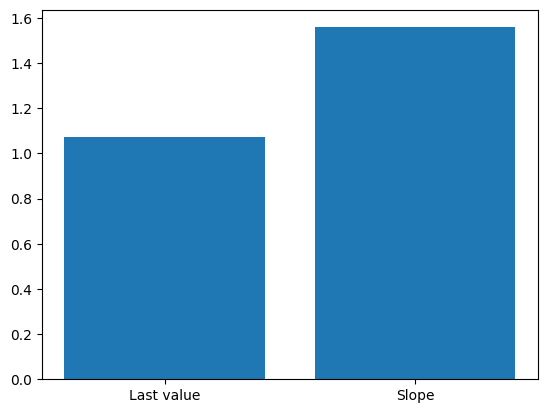

In [30]:
plt.bar(['Last value', 'Slope'],[mean_squared_error(df_test,forecast) for forecast in [df_forecasting_last_value, df_forecasting_slope]  ])

In [29]:
[mean_squared_error(df_test,forecast) for forecast in [df_forecasting_mean,df_forecasting_last_value, df_forecasting_slope]  ]

[890.0389389997663, 1.0714112654038075, 1.5587495729423118]